<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


**CONTESTO:**

Il set di dati CalCOFI rappresenta la serie temporale più lunga (1949-oggi) e più completa (più di 50.000 stazioni di campionamento) di dati oceanografici e larvali di pesci nel mondo. Include dati sull'abbondanza delle larve di oltre 250 specie di pesci; dati sulla frequenza della lunghezza larvale e dati sull'abbondanza di uova su specie commerciali chiave; e dati oceanografici e planctonici. I dati fisici, chimici e biologici raccolti a intervalli regolari di tempo e spazio sono diventati rapidamente preziosi per documentare i cicli climatici nella Corrente della California e una serie di risposte biologiche ad essi.


**OBIETTIVO:** 

Rispondere alle seguenti domande analizzando e creando uno o più modelli predittivi, utilizzando i vari algoritmi visti a lezione (albero decisionale regressore, regressione lineare etc..) a partire dai dati a disposizione:

-------------------------------------------------------------------------
- Esiste una relazione tra salinità dell'acqua e temperatura dell'acqua? Giustifica la tua risposta con l'output del tuo modello predittivo
- Puoi prevedere la temperatura dell'acqua in base alla salinità?


**DATI A DISPOSIZIONE:**

Da questo link puoi scaricare i dati necessari:

https://www.kaggle.com/datasets/sohier/calcofi

NOTA BENE: per questo esercizio è richiesto di utilizzare solamente le prime 500 righe del dataset. 




In [192]:
import pandas as pd
df=pd.read_csv('bottle.csv',low_memory=False)
df=df.head(500)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cst_Cnt              500 non-null    int64  
 1   Btl_Cnt              500 non-null    int64  
 2   Sta_ID               500 non-null    object 
 3   Depth_ID             500 non-null    object 
 4   Depthm               500 non-null    int64  
 5   T_degC               499 non-null    float64
 6   Salnty               494 non-null    float64
 7   O2ml_L               0 non-null      float64
 8   STheta               493 non-null    float64
 9   O2Sat                0 non-null      float64
 10  Oxy_µmol/Kg          0 non-null      float64
 11  BtlNum               0 non-null      float64
 12  RecInd               500 non-null    int64  
 13  T_prec               499 non-null    float64
 14  T_qual               4 non-null      float64
 15  S_prec               494 non-null    flo

In [194]:
df = df[["T_degC","Salnty"]]

In [ ]:
df

In [195]:
### tolgo gli NA
df=df.dropna(axis="rows")

In [ ]:
df

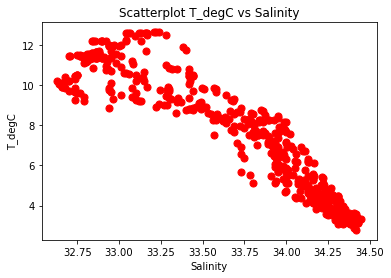

In [196]:
import matplotlib.pyplot as plt

plt.scatter(df['Salnty'],df['T_degC'], color='red', s=50)

plt.title('Scatterplot T_degC vs Salinity')
plt.xlabel('Salinity')
plt.ylabel('T_degC')

# show the plot
plt.show()

In [197]:
df.corr()

,T_degC,Salnty
T_degC,1.0000,-0.9229
Salnty,-0.9229,1.0000


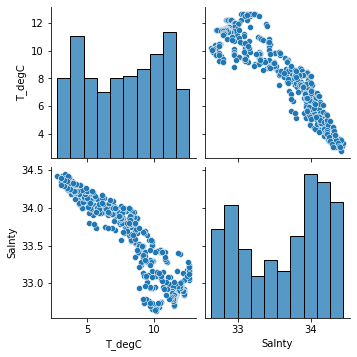

In [198]:
import seaborn as sns
columns = ['T_degC','Salnty']
sns.pairplot(df[columns]);

In [199]:
### sklearn non ammette un solo vettore come X in input ma ha bisogno che sia passato come una matrice
### i comandi che seguono trasformano X in una matrice 493 x 1
import numpy as np
X=df['Salnty']
y=df['T_degC']
X=X[:, np.newaxis]
X.shape

C:\Users\Irene.borrelli\AppData\Local\Temp\ipykernel_5472\1494725952.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=X[:, np.newaxis]


(493, 1)

In [200]:
### comando alternativo a np.newaxis
import numpy as np
X=np.array(df['Salnty'])
y=df['T_degC']
X=X.reshape((-1,1))
X.shape

(493, 1)

In [201]:
### modello lineare
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### modello di regressione lineare
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [202]:
### estraggo dal modello il coefficiente della X e l'intercetta
model.coef_
### per ogni unità di salinità la temperatura scende in media di 4,8 gradi

array([-4.75787562])

In [203]:
model.intercept_
### a salinità 0 le temperatura è pari a 168 gradi

167.83570595134805

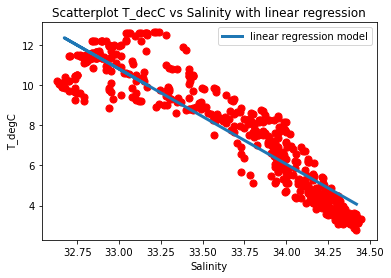

In [204]:
### scatterplot delle osservazioni con il plot con il modello di regressione
import matplotlib.pyplot as plt

plt.scatter(df['Salnty'],df['T_degC'],color='red', s=50)

plt.title('Scatterplot T_decC vs Salinity with linear regression')
plt.xlabel('Salinity')
plt.ylabel('T_degC')
plt.plot(X_test, y_pred, linewidth = 3, label= "linear regression model"); 

# setting x and y axis range
#plt.ylim(0,200)
#plt.xlim(0,40)

# show a legend on the plot
plt.legend()
# show the plot
plt.show()

In [205]:
### guardo gli errori del modello
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_score = mean_squared_error(y_test, y_pred)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print ("\nModel Report\n")
print('mse score:', mse_score)
print('\nrmse score: ', rmse_score)
print('\nmae score: ', mae_score)
print('\nR2 score: ', r2_score)


Model Report

mse score: 1.1621302925850419

rmse score:  1.0780214713005682

mae score:  0.8523158126000381

R2 score:  0.860806858980515


In [ ]:
### plot dei residui con seaborn

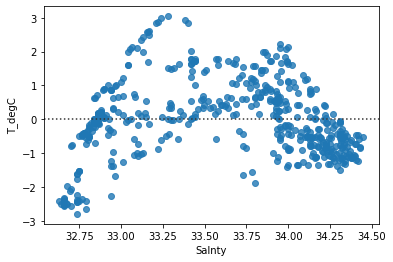

In [206]:
import seaborn as sns
sns.residplot(data=df, x="Salnty", y="T_degC");

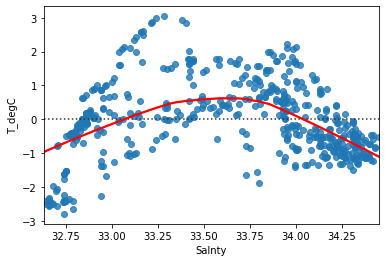

In [207]:
sns.residplot(data=df, x="Salnty", y="T_degC",lowess=True, line_kws=dict(color="r"));

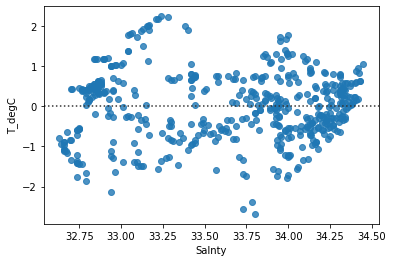

In [211]:
### i residui non sembrano distribuiti casualmente, con order=2 sembra migliorare
### quindi probabilmente sarebbe meglio applicare una trasformazione quadratica alla X
sns.residplot(data=df, x="Salnty", y="T_degC", order=2);

In [212]:
#calcolo i residui manualmente e faccio il plot
y_model = lr.predict(X)

In [213]:
resid=y-y_model

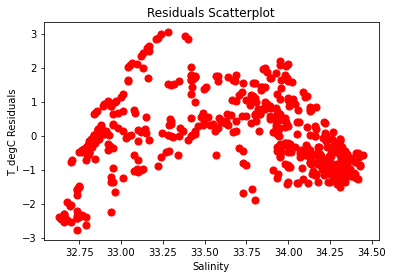

In [214]:
import matplotlib.pyplot as plt

plt.scatter(X,resid,color='red', s=50)

plt.title('Residuals Scatterplot')
plt.xlabel('Salinity')
plt.ylabel('T_degC Residuals')
# show the plot
plt.show()

In [215]:
#scatterplot dei residui solo in test
resid=y_pred-y_test

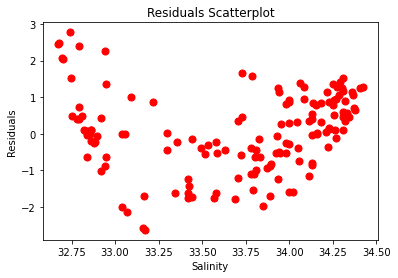

In [216]:
import matplotlib.pyplot as plt

plt.scatter(X_test,resid,color='red', s=50)

plt.title('Residuals Scatterplot')
plt.xlabel('Salinity')
plt.ylabel('Residuals')
# setting x and y axis range
#plt.ylim(0,200)
#plt.xlim(0,40)

# show a legend on the plot
#plt.legend()
# show the plot
plt.show()

In [ ]:
### provo la trasformazione quadratica della matrice X: interpolazione tramite parabola

In [217]:
df2=df
df2['Salnty_q']=df2['Salnty']**2
df2.head()

,T_degC,Salnty,Salnty_q
0,10.50,33.440,1118.233600
1,10.46,33.440,1118.233600
2,10.46,33.437,1118.032969
3,10.45,33.420,1116.896400
4,10.45,33.421,1116.963241


In [218]:
X=df[['Salnty_q','Salnty']]
y=df['T_degC']

In [219]:
### modello lineare con parabola
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### modello di regressione lineare
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [220]:
### guardo gli errori del modello
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_score = mean_squared_error(y_test, y_pred)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print ("\nModel Report\n")
print('mse score:', mse_score)
print('\nrmse score: ', rmse_score)
print('\nmae score: ', mae_score)
print('\nR2 score: ', r2_score)


Model Report

mse score: 0.584282819010784

rmse score:  0.7643839473790538

mae score:  0.626270195489321

R2 score:  0.9272995554115486


In [221]:
#calcolo i residui
y_model = lr.predict(X)
resid=y-y_model

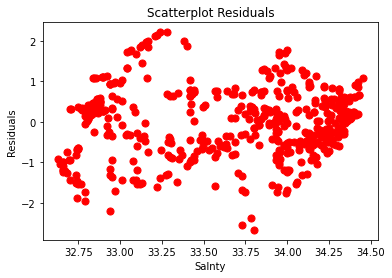

In [222]:
import matplotlib.pyplot as plt

plt.scatter(X['Salnty'],resid,color='red', s=50)

plt.title('Scatterplot Residuals')
plt.xlabel('Salnty')
plt.ylabel('Residuals')

# setting x and y axis range
#plt.ylim(0,200)
#plt.xlim(0,40)

# show a legend on the plot
#plt.legend()
# show the plot
plt.show()

In [223]:
X=X.sort_values(by='Salnty')
y_model = lr.predict(X)

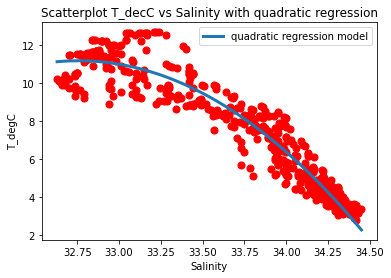

In [224]:
### faccio il plot con il modello di regressione quadratica
import matplotlib.pyplot as plt

plt.scatter(df['Salnty'],df['T_degC'],color='red', s=50)

plt.title('Scatterplot T_decC vs Salinity with quadratic regression')
plt.xlabel('Salinity')
plt.ylabel('T_degC')
plt.plot(X['Salnty'], y_model, linewidth = 3, label= "quadratic regression model"); 

# setting x and y axis range
#plt.ylim(0,200)
#plt.xlim(0,40)

# show a legend on the plot
plt.legend()
# show the plot
plt.show()

In [ ]:
### decision tree regression

In [225]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [226]:
mse_score = mean_squared_error(y_test, y_pred)
rmse_score = np.sqrt(mse_score)
mae_score = mean_absolute_error(y_test, y_pred)
#r2_score = r2_score(y_test, y_pred)
score = dt.score(X_train,y_train)

print ("\nModel Report\n")
print('mse score:', mse_score)
print('\nrmse score: ', rmse_score)
print('\nmae score: ', mae_score)
print("\nR-squared:", score) 


Model Report

mse score: 1.3073635647522521

rmse score:  1.1434000020781232

mae score:  0.8452308558558559

R-squared: 0.9793668028812565


In [ ]:
### più alti del linear

In [227]:
import numpy as np
X=np.array(df['Salnty'])
y=df['T_degC']
X=X.reshape((-1,1))
X.shape

(493, 1)

In [228]:
### confronto Linear regression vs Decision Tree Regression vs quadratic

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [229]:
### modello di regressione lineare
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr_all=lr.predict(X)


In [230]:
#X_train e X_test per regressione quadratica
X_train_sq=X_train**2
X_test_sq=X_test**2
X_sq=X**2

X_train_q=np.column_stack((X_train, X_train_sq))
X_test_q=np.column_stack((X_test, X_test_sq))
X_q=np.column_stack((X, X_sq))

In [231]:
### modello di regressione quadratica

from sklearn.linear_model import LinearRegression
lrq = LinearRegression()
model=lrq.fit(X_train_q,y_train)
y_pred_qr = lrq.predict(X_test_q)
y_pred_qr_all = lrq.predict(X_q)


In [232]:
### decison tree regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_tr = dt.predict(X_test)
y_pred_tr_all = dt.predict(X)

In [233]:
### ordino X_test per visualizzare meglio il plot del decision tree
sorted_v=np.sort(X,axis=0)
sorted_v

y_pred_lr = lr.predict(sorted_v)
y_pred_tr = dt.predict(sorted_v)

In [234]:
X_q=np.sort(X_q,axis=0)
y_pred_qr = lrq.predict(X_q)

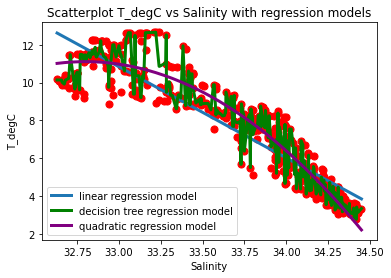

In [235]:
### faccio il plot con tutti i modelli
import matplotlib.pyplot as plt

plt.scatter(df['Salnty'],df['T_degC'],color='red', s=50)

plt.title('Scatterplot T_degC vs Salinity with regression models')
plt.xlabel('Salinity')
plt.ylabel('T_degC')
plt.plot(sorted_v, y_pred_lr, linewidth = 3, label= "linear regression model"); 
plt.plot(sorted_v, y_pred_tr, linewidth = 3, label= "decision tree regression model", color='green'); 
plt.plot(sorted_v, y_pred_qr, linewidth = 3, label= "quadratic regression model", color='purple'); 


# show a legend on the plot
plt.legend()
# show the plot
plt.show()